# Initialization

In [113]:
import pandas as pd 
from sklearn.decomposition import PCA, KernelPCA
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

## Data loading - Test, train split

In [114]:
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

## Normalization

In [115]:
scaler = StandardScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

## PCA 

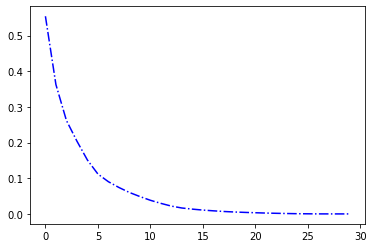

In [118]:
pca = PCA()
pca.fit(X_train)
singular_values, total = pca.explained_variance_, sum(pca.explained_variance_)
re_error = []
err = 0
for item in singular_values:
    err += item
    re_error.append(1 - err/total)
    
plt.plot(re_error, 'b-.')

In [119]:
re_error

[0.5543715163759735,
 0.36281795545172224,
 0.26217853705784033,
 0.20418982487589266,
 0.15122088030438186,
 0.11188553572873194,
 0.09032012063036643,
 0.07417702677726246,
 0.06020313619915563,
 0.04872819908426251,
 0.0382399977836867,
 0.0295948090024869,
 0.021903243499438396,
 0.016593087318969135,
 0.013429825685248309,
 0.010759320065443556,
 0.008682207369842043,
 0.006820009567246044,
 0.005385676478357415,
 0.004266481883903439,
 0.003303272656165923,
 0.002388154890499372,
 0.0017157430860555989,
 0.0011155752679019582,
 0.0005772862757276176,
 0.00031964655687366506,
 8.67059078155652e-05,
 3.2784827827869734e-05,
 4.536720804027006e-06,
 0.0]

## Data transformation

In [121]:
pc = 17
transformation = pca.components_[:, 0:pc]
X_train_transformed = np.dot(X_train, transformation)
X_test_transformed = np.dot(X_test, transformation)
print(X_train.shape, X_train_transformed.shape)

(398, 30) (398, 17)


## Classification

In [124]:
model = SVC(kernel = 'rbf')
model.fit(X_train_transformed, y_train)
y_pre = model.predict(X_test_transformed)
confusion_matrix(y_pre, y_test).T

array([[ 39,   0],
       [  3, 129]], dtype=int64)

## Kernel PCA

In [125]:
kernel_pca = KernelPCA(n_components = pc, kernel = 'rbf')
kernel_pca.fit(X_train)
X_train_transformed = kernel_pca.transform(X_train)
X_test_transformed = kernel_pca.transform(X_test)

## Modeling

In [127]:
model = SVC()
model.fit(X_train_transformed, y_train)
y_pre = model.predict(X_test_transformed)
confusion_matrix(y_pre, y_test).T

array([[ 39,   0],
       [  5, 127]], dtype=int64)